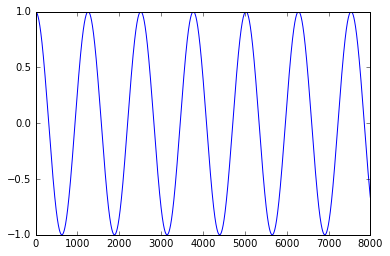

(8000, 2)


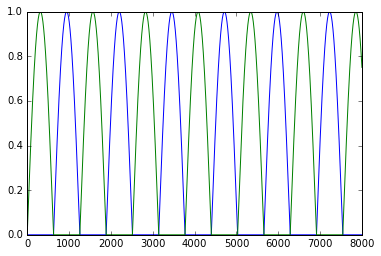

In [1]:
trainlen = 4000
future = 4000
full = trainlen + future
from scipy.interpolate import interp1d

xs = np.linspace(0, full, num=full, endpoint=True)
x = np.linspace(0, full, num=full, endpoint=True)
y = np.cos(-x/200)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')


d = np.array([f2(x) for x in np.arange(0,full,1)])
plt.plot(d); plt.show()

s =np.append([0],[np.array(d[1:]) - np.array(d[:-1])])
s = (s/max(s))
s_orig = s.copy()
#s[s>=0] = 1
#s[s<=0] = -1

su = s.copy()
su[su<0] = 0

sd = s.copy()
sd[sd>0] = 0
sd = -sd
s = np.vstack([su,sd]).T
print s.shape
plt.plot(s[:,0]);
plt.plot(s[:,1]);
plt.show()

Using Matrix
Using Input Matrix


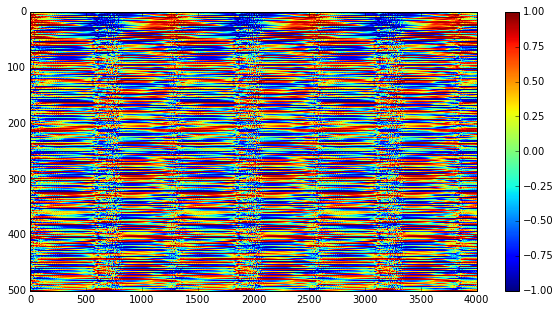

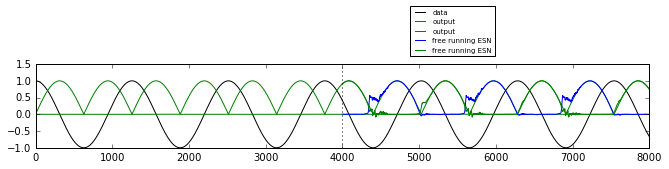

In [4]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline
n_reservoir =500
matrix = np.random.rand(n_reservoir,n_reservoir)
sparcity = 0.9
matrix[matrix<sparcity] = 0

matrix[matrix>=sparcity] = 1

# Load a visul system matrix
# Specify Inputs

# Specify Outputs


data = d
n_inputs =1
input_matrix = np.zeros((n_reservoir, n_inputs))
input_matrix[0:50] = 1
    
esn = ESN(n_inputs = n_inputs,
          n_outputs = 2,
          n_reservoir = n_reservoir,
          spectral_radius = 1.5,
          random_state=42,
          teacher_forcing=True,
          matrix=matrix,
          input_matrix = input_matrix)


pred_training = esn.fit(data[:trainlen],s[:trainlen,:],True)

prediction = esn.predict(data[trainlen:trainlen+future,])
#print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

plt.figure(figsize=(11,1.5))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="data")
plt.plot(s[1:trainlen+future],'g',label="output")

plt.plot(range(trainlen,trainlen+future),prediction, label="free running ESN")

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')

In [5]:
import csv
import networkx as nx

G = nx.DiGraph()
with open("ffbo_connectivity.csv", "rb") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        if i ==0: 
            print 'line[{}] = {}'.format(i, line)
        else:
            #print 'line[{}] = {}'.format(i, line)
            pre = line[0]
            post = line[1]
            w = line[2]
            if pre not in G.nodes(): G.add_node(pre)
            if post not in G.nodes(): G.add_node(post)
            try:
                if int(w) != 0:
                    G.add_edge(pre,post,weight=int(w))
            except:
                print "Failed on %s %s %s " % (pre,post,w)
           

line[0] = ['PreSynaptic Neuron', 'PostSynaptic Neuron', 'N', 'Inferred']
Failed on L5-D Tm23_24 undefined 
Failed on Tm5Y-Q Tm23_24 undefined 
Failed on Mi22-1 Tm23_24 undefined 
Failed on Tm2-D Tm23_24 undefined 
Failed on Dm3x-0 Tm23_24 undefined 
Failed on Tm20-C Tm23_24 undefined 
Failed on Tm5Y-C Tm23_24 undefined 
Failed on Tm8_like Tm23_24 undefined 
Failed on Tm23_24 Tm25_Y1-home undefined 
Failed on Tm23_24 TmY3-P undefined 
Failed on Tm23_24 Y3_Y6-4 undefined 
Failed on Tm23_24 Tm8_like undefined 
Failed on Tm23_24 TmY3-home undefined 
Failed on Tm23_24 TmY10_like-0 undefined 
Failed on Tm23_24 TmY3-B undefined 
Failed on Tm23_24 C2-C undefined 
Failed on Tm23_24 Tm5Y-C undefined 
Failed on Tm23_24 Tm4-C undefined 
Failed on Tm23_24 Tm5a-C undefined 
Failed on Tm23_24 TmY3-F undefined 
Failed on TmY13_like-0 Tm23_24 undefined 
Failed on Tm5c-0 Tm23_24 undefined 
Failed on Y3_Y6-2 Tm23_24 undefined 
Failed on T3-B Tm23_24 undefined 
Failed on T3-K Tm23_24 undefined 
Failed on 

Using Matrix
Using Input Matrix


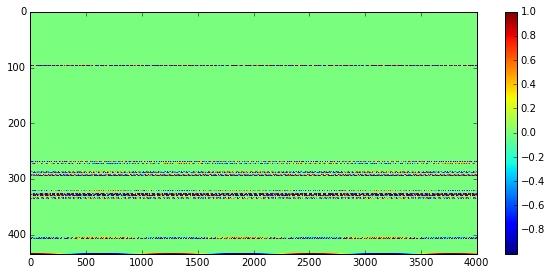

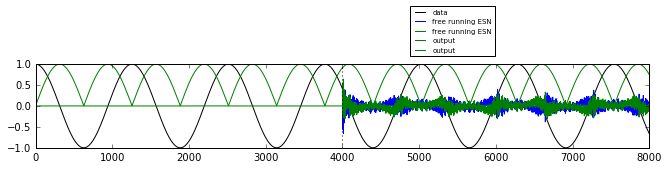

In [6]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline
n_reservoir =G.number_of_nodes()


# Load a visul system matrix
# Specify Inputs

# Specify Outputs


data = d
n_inputs =1
matrix = nx.adjacency_matrix(G, weight='weight').todense()

input_matrix = np.zeros((n_reservoir, n_inputs))

for i,n in enumerate(G.nodes()):
    if 'L1' in n or  'L2' in n or  'L4' in n:
        input_matrix[i,0] = 1
    
esn = ESN(n_inputs = n_inputs,
          n_outputs = 2,
          n_reservoir = n_reservoir,
          spectral_radius = 1.5,
          random_state=42,
          teacher_forcing=False,
          matrix=matrix,
          input_matrix = input_matrix)

#Create a list of network outputs that can be used to train upon
# We focus oon the T4 and Tm* neurons
o_nodes = np.zeros((input_matrix.shape[1],input_matrix.shape[0]))
for i,n in enumerate(G.nodes()):
    if 'Tm3' in n or 'Mi1' in n:
    
        o_nodes[:,i] = 1


pred_training = esn.fit(data[:trainlen],s[:trainlen],True,o_nodes)

prediction = esn.predict(data[trainlen:trainlen+future])
#print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

plt.figure(figsize=(11,1.5))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="data")


plt.plot(range(trainlen,trainlen+future),prediction, label="free running ESN")
plt.plot(s[1:trainlen+future],'g',label="output")

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')

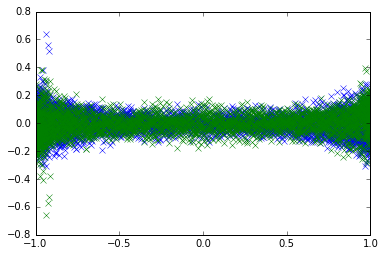

In [7]:
plt.plot(s_orig[-4000:], prediction[:,1],'x')
plt.plot(s_orig[-4000:], prediction[:,0],'x')



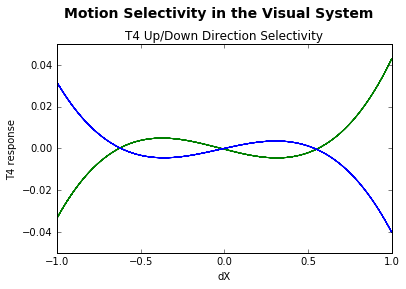

In [8]:
x =s_orig[-4000:]
y = prediction[:,0]
fit = np.polyfit(x,y,3)
y_new = np.polyval(fit,x)
#plt.plot(x,y,'b-')


fig = plt.figure()
fig.suptitle('Motion Selectivity in the Visual System', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('T4 Up/Down Direction Selectivity')

ax.set_xlabel('dX')
ax.set_ylabel('T4 response')

ax.plot(x,y_new,'g-')


y = prediction[:,1]
fit = np.polyfit(x,y,3)
y_new = np.polyval(fit,x)
#plt.plot(x,y,'g-')
ax.plot(x,y_new,'b-')


plt.show()